<a href="https://colab.research.google.com/github/gillis42/csv_loc/blob/master/PUBLIC_Mutliplot_TLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Process and plot TLE DATA for Sherpa LTE1  

Throw away login details:

*   searchingforsherpaman@gmail.com
*   SherpaLTE1_July2021
*   noad_cat_id = 48941

(note these may expire, reccomend making a copy of this notebook and getting your own login details)

Notbook is designed to plot altitude for 3 spacecraft. Set norad_cat_id to '0' if you don't want the 2nd or 3rd plots

Fun things to plot:

*  Sherpa-LTE1 48941
*  Sherpa-FX2 48958
*  Photon 47974
*  A Skysat 42991
*  D-orbit Ion from Transporter 2 48912
*  Capella on transporter 2 48913
*  Astra Sat 49494
*  ISS 25544 (Takes a while as 20 years of data)

Note, this is on a time/date x-axis so data won't line up spacecraft launched on different dates 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks


[]

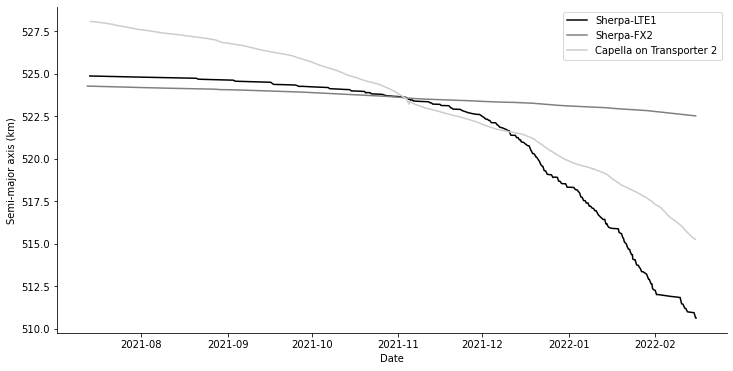

In [38]:
import sys
import re
import csv
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
from google.colab import drive
import os

#@title Require email and password from https://www.space-track.org.

spacetrack_email = 'searchingforsherpaman@gmail.com' #@param {type:"string"}
spacetrack_password = 'SherpaLTE1_July2021' #@param {type:"string"}
satellite1_norad_cat_id = 48941 #@param {type:"integer"}
satellite1_label = 'Sherpa-LTE1' #@param {type:"string"}
satellite2_norad_cat_id = 48958 #@param {type:"integer"}
satellite2_label = 'Sherpa-FX2' #@param {type:"string"}
satellite3_norad_cat_id = 48913 #@param {type:"integer"}
satellite3_label = 'Capella on Transporter 2' #@param {type:"string"}


drive.mount('/content/gdrive')
%cd "/content/gdrive/My Drive/Colab Notebooks/"

# Install and loginto Spacetrack app (note, they do restrict logins so you can get blocekd)
!pip install spacetrack
import spacetrack.operators as op
from spacetrack import SpaceTrackClient
import spacetrack.operators as op

#Matthew login
st = SpaceTrackClient(identity=spacetrack_email, password=spacetrack_password)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

# Streaming downloads line by line
# 48941 is SHERPA LTE1
if satellite1_norad_cat_id != 0:
  lines = st.tle(iter_lines=True, norad_cat_id=satellite1_norad_cat_id, format='kvn')
  with open('kvn.txt', 'w') as fp:
      for line in lines:
          fp.write(line + '\n')

  # Extract data from files using bash
  !grep 'MEAN_MOTION                        =' kvn.txt > MEANMOTION.txt
  !grep 'EPOCH                              =2' kvn.txt > EPOCH.txt
  !sed -i 's:.*=::' MEANMOTION.txt 
  !sed -i 's:.*=::' EPOCH.txt 

  # Process files to get Semi Major axis data (this is the only value we need)
  filename = '/content/gdrive/My Drive/Colab Notebooks/'
  data_tle = pd.read_csv(filename + 'MEANMOTION.txt')
  data_epoch = pd.read_csv(filename + 'EPOCH.txt')
  data = pd.concat([data_epoch, data_tle], axis=1)
  data.columns = ['Date', 'Mean Motion'] 
  data["Date"] = pd.to_datetime(data['Date'])#, unit='s')
  data['rad per s'] = data['Mean Motion']*((2*np.pi)/86400)
  data['Semi-major axis'] = (((398600.4418)**(1/3))/(data['rad per s']**(2/3)))-6378.137 

  # Plot
  ax.plot(data['Date'][10:], data['Semi-major axis'][10:], color='0', ls='-', label=satellite1_label)
  !rm kvn.txt MEANMOTION.txt EPOCH.txt


# TLE for satellite 2
if satellite2_norad_cat_id != 0:
  lines = st.tle(iter_lines=True, norad_cat_id=satellite2_norad_cat_id, format='kvn')
  with open('kvn.txt', 'w') as fp:
      for line in lines:
          fp.write(line + '\n')

  # Extract data from files using bash
  !grep 'MEAN_MOTION                        =' kvn.txt > MEANMOTION.txt
  !grep 'EPOCH                              =2' kvn.txt > EPOCH.txt
  !sed -i 's:.*=::' MEANMOTION.txt 
  !sed -i 's:.*=::' EPOCH.txt 

  # Process files to get Semi Major axis data (this is the only value we need)
  filename = '/content/gdrive/My Drive/Colab Notebooks/'
  data_tle = pd.read_csv(filename + 'MEANMOTION.txt')
  data_epoch = pd.read_csv(filename + 'EPOCH.txt')
  data = pd.concat([data_epoch, data_tle], axis=1)
  data.columns = ['Date', 'Mean Motion'] 
  data["Date"] = pd.to_datetime(data['Date'])#, unit='s')
  data['rad per s'] = data['Mean Motion']*((2*np.pi)/86400)
  data['Semi-major axis'] = (((398600.4418)**(1/3))/(data['rad per s']**(2/3)))-6378.137 

  # Plot
  ax.plot(data['Date'][10:], data['Semi-major axis'][10:], color='0.5', ls='-', label=satellite2_label)
  !rm kvn.txt MEANMOTION.txt EPOCH.txt


# TLE for satellite 3
if satellite3_norad_cat_id != 0:
  lines = st.tle(iter_lines=True, norad_cat_id=satellite3_norad_cat_id, format='kvn')
  with open('kvn.txt', 'w') as fp:
      for line in lines:
          fp.write(line + '\n')

  # Extract data from files using bash
  !grep 'MEAN_MOTION                        =' kvn.txt > MEANMOTION.txt
  !grep 'EPOCH                              =2' kvn.txt > EPOCH.txt
  !sed -i 's:.*=::' MEANMOTION.txt 
  !sed -i 's:.*=::' EPOCH.txt 

  # Process files to get Semi Major axis data (this is the only value we need)
  filename = '/content/gdrive/My Drive/Colab Notebooks/'
  data_tle = pd.read_csv(filename + 'MEANMOTION.txt')
  data_epoch = pd.read_csv(filename + 'EPOCH.txt')
  data = pd.concat([data_epoch, data_tle], axis=1)
  data.columns = ['Date', 'Mean Motion'] 
  data["Date"] = pd.to_datetime(data['Date'])#, unit='s')
  data['rad per s'] = data['Mean Motion']*((2*np.pi)/86400)
  data['Semi-major axis'] = (((398600.4418)**(1/3))/(data['rad per s']**(2/3)))-6378.137 

  # Plot
  ax.plot(data['Date'][10:], data['Semi-major axis'][10:], color='0.8', ls='-', label=satellite3_label)
  !rm kvn.txt MEANMOTION.txt EPOCH.txt



ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('Semi-major axis (km)', fontsize=10)
ax.set_xlabel('Date', fontsize=10)
ax.legend(loc='upper right')

plt.plot()

# Remove remporary files
